Example 2.5
===========

This notebook is available on github
[here](https://github.com/aezarebski/aas-extended-examples). If you find
errors or would like to suggest an improvement, feel free to create an
issue.

As usual we will start by importing some useful libraries.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import os.path as path

In this notebook we will also use an additional module, `heatmap`, which provides a function for drawing heatmaps of the correlations between columns of a pandas dataframe. If you are using Colab please refer to the next cell which shows how to load a remote version of the module and data.

In [2]:
assert path.exists('heatmap.py')
from heatmap import correlation_heatmap

AssertionError: 

If you are running this notebook somewhere without access to `heatmap.py` then the following snippet will download a copy of it and use that.

In [19]:
assert not path.exists('heatmap.py')

import requests

heatmap_py_url = 'https://raw.githubusercontent.com/aezarebski/aas-extended-examples/main/example-2.5/heatmap.py'
req = requests.get(heatmap_py_url)

with open('urlheatmap.py', 'w') as f:
    f.write(req.text)
    
from urlheatmap import correlation_heatmap

The data in `data-auto.csv` is a popular dataset of car characteristics. In this notebook we will be looking at the miles per gallon (MPG) achieved by these cars based on some features of the cars and where/when they were produced. The `origin` of the car is encoded as an integer, (recall you can use the `dtypes` method to see this). The representation of the data is clearer by mapping it to a string describing the origin.

In [4]:
data_csv = 'data-auto.csv'
if not path.exists(data_csv):
    data_csv = 'https://raw.githubusercontent.com/aezarebski/aas-extended-examples/main/example-2.5/data-auto.csv'
df = pd.read_csv(data_csv)

In [5]:
df.origin = df.origin.map({1: 'America', 2: 'Europe', 3: 'Japan'})

In [6]:
col_names = df.columns.to_list()
numeric_cols = col_names[0:7] 

A heatmap of the correlations between the variables in the data is a good way to get a feel for the data.

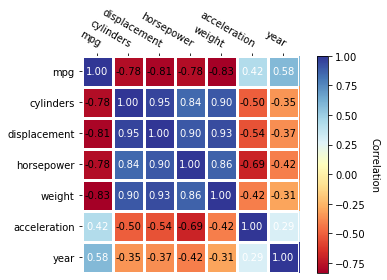

In [7]:
correlation_heatmap(df[numeric_cols])
plt.show()

/nix/store/smcqcgyvdgr2fab1z6mwa5w9a4ab7kkm-python3-3.8.9-env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<Figure size 432x288 with 0 Axes>

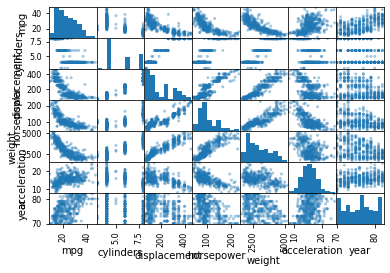

In [8]:
plt.figure()
pd.plotting.scatter_matrix(df[numeric_cols], alpha = 0.4)
plt.show()

### Question

What do you notice about `cylinders`, `displacement`, `horsepower` and `weight`?

### Question

Fit an ordinary linear regression for the MPG using all of the variables (excluding the name of the car). Print a summary of the fitted model. Comment on the results, how has the MPG changed over time?

### Question

Plot the residuals against the fitted values, what do you notice?

### Question

Did you get any warnings when you fitted the model? How might you resolve them?

### Question

Apply some transforms to reduce non-linearities in the relationship between the predictors and the response.

### Question

Re-fit the model with the transformed variables and comment on what has changed. Do you need all of the variables?

### Question

Include an interaction term between the origin of the cars and their year or release. What does this tell you about car manufactoring in the considered regions?